# Problem statement:
Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")
Attribute information For bank dataset

   Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
sns.set_theme(style='darkgrid',palette='turbo_r')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bank-full.csv',sep=';')

In [5]:
df.isna().sum()#no missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# one-hot encoding for categorical columns

In [7]:
df1=pd.get_dummies(data=df,columns=['job','marital','education','contact','month','poutcome'])

In [9]:
df1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,5,261,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
1,44,no,29,yes,no,5,151,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
2,33,no,2,yes,yes,5,76,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
3,47,no,1506,yes,no,5,92,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
4,33,no,1,no,no,5,198,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,977,3,-1,0,...,False,False,False,True,False,False,False,False,False,True
45207,71,no,1729,no,no,17,456,2,-1,0,...,False,False,False,True,False,False,False,False,False,True
45208,72,no,5715,no,no,17,1127,5,184,3,...,False,False,False,True,False,False,False,False,True,False
45209,57,no,668,no,no,17,508,4,-1,0,...,False,False,False,True,False,False,False,False,False,True


# binarary encoding for yes and no categorical columns

In [11]:
df1['default']=np.where(df1['default'].str.contains('yes'),1,0)
df1['housing']=np.where(df1['housing'].str.contains('yes'),1,0)
df1['loan']=np.where(df1['loan'].str.contains('yes'),1,0)
df1['y']=np.where(df1['y'].str.contains('yes'),1,0)
df1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
3,47,0,1506,1,0,5,92,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,False,False,False,True,False,False,False,False,False,True
45207,71,0,1729,0,0,17,456,2,-1,0,...,False,False,False,True,False,False,False,False,False,True
45208,72,0,5715,0,0,17,1127,5,184,3,...,False,False,False,True,False,False,False,False,True,False
45209,57,0,668,0,0,17,508,4,-1,0,...,False,False,False,True,False,False,False,False,False,True


In [ ]:
#scaling the numerical data

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df1[num_cols] = sc.fit_transform(df1[num_cols])

df1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0,0.256419,1,0,-1.298476,261,-0.569351,-0.411453,-0.25194,...,False,False,True,False,False,False,False,False,False,True
1,0.288529,0,-0.437895,1,0,-1.298476,151,-0.569351,-0.411453,-0.25194,...,False,False,True,False,False,False,False,False,False,True
2,-0.747384,0,-0.446762,1,1,-1.298476,76,-0.569351,-0.411453,-0.25194,...,False,False,True,False,False,False,False,False,False,True
3,0.571051,0,0.047205,1,0,-1.298476,92,-0.569351,-0.411453,-0.25194,...,False,False,True,False,False,False,False,False,False,True
4,-0.747384,0,-0.447091,0,0,-1.298476,198,-0.569351,-0.411453,-0.25194,...,False,False,True,False,False,False,False,False,False,True


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   default              45211 non-null  int32  
 2   balance              45211 non-null  float64
 3   housing              45211 non-null  int32  
 4   loan                 45211 non-null  int32  
 5   day                  45211 non-null  float64
 6   duration             45211 non-null  int64  
 7   campaign             45211 non-null  float64
 8   pdays                45211 non-null  float64
 9   previous             45211 non-null  float64
 10  y                    45211 non-null  int32  
 11  job_admin.           45211 non-null  bool   
 12  job_blue-collar      45211 non-null  bool   
 13  job_entrepreneur     45211 non-null  bool   
 14  job_housemaid        45211 non-null  bool   
 15  job_management       45211 non-null 

# define x and y

In [14]:
x=pd.concat([df1.iloc[:,0:10],df1.iloc[:,11:]],axis=1)

In [15]:
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0,0.256419,1,0,-1.298476,261,-0.569351,-0.411453,-0.251940,...,False,False,True,False,False,False,False,False,False,True
1,0.288529,0,-0.437895,1,0,-1.298476,151,-0.569351,-0.411453,-0.251940,...,False,False,True,False,False,False,False,False,False,True
2,-0.747384,0,-0.446762,1,1,-1.298476,76,-0.569351,-0.411453,-0.251940,...,False,False,True,False,False,False,False,False,False,True
3,0.571051,0,0.047205,1,0,-1.298476,92,-0.569351,-0.411453,-0.251940,...,False,False,True,False,False,False,False,False,False,True
4,-0.747384,0,-0.447091,0,0,-1.298476,198,-0.569351,-0.411453,-0.251940,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,0,-0.176460,0,0,0.143418,977,0.076230,-0.411453,-0.251940,...,False,False,False,True,False,False,False,False,False,True
45207,2.831227,0,0.120447,0,0,0.143418,456,-0.246560,-0.411453,-0.251940,...,False,False,False,True,False,False,False,False,False,True
45208,2.925401,0,1.429593,0,0,0.143418,1127,0.721811,1.436189,1.050473,...,False,False,False,True,False,False,False,False,True,False
45209,1.512791,0,-0.228024,0,0,0.143418,508,0.399020,-0.411453,-0.251940,...,False,False,False,True,False,False,False,False,False,True


In [16]:
y=df1['y']

In [17]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

# Model Building

In [18]:
#spliting the data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lg=LogisticRegression()

In [23]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [24]:
lg.coef_

array([[-0.03853617, -0.07527159,  0.03413167, -0.69239139, -0.55942035,
        -0.01068499,  0.00394765, -0.28228879, -0.07461661, -0.05610318,
         0.0963702 , -0.33480898, -0.17681613, -0.18987222, -0.18251035,
         0.21882212, -0.138682  , -0.185404  ,  0.2117039 , -0.21417545,
        -0.07244431, -0.05471332, -0.40900864, -0.40615625, -0.20736566,
        -0.53345999, -0.09541655, -0.21272677, -0.18092724,  0.17689383,
        -0.07279492, -1.12662945,  0.22080478, -0.55607509,  0.13975467,
        -0.18226996, -0.44879102, -0.59766499,  0.04958604,  0.54248366,
        -0.42462345, -0.63172239,  0.47584362,  0.39014359, -0.86007675,
        -0.35826877,  1.38997874, -1.19416377]])

In [25]:
ypred=lg.predict(xtest)

In [26]:
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
from sklearn.metrics import confusion_matrix,classification_report

In [28]:
confusion_matrix(ytest,ypred)#tn, fp, fn, tp

array([[7782,  170],
       [ 745,  346]], dtype=int64)

<Axes: >

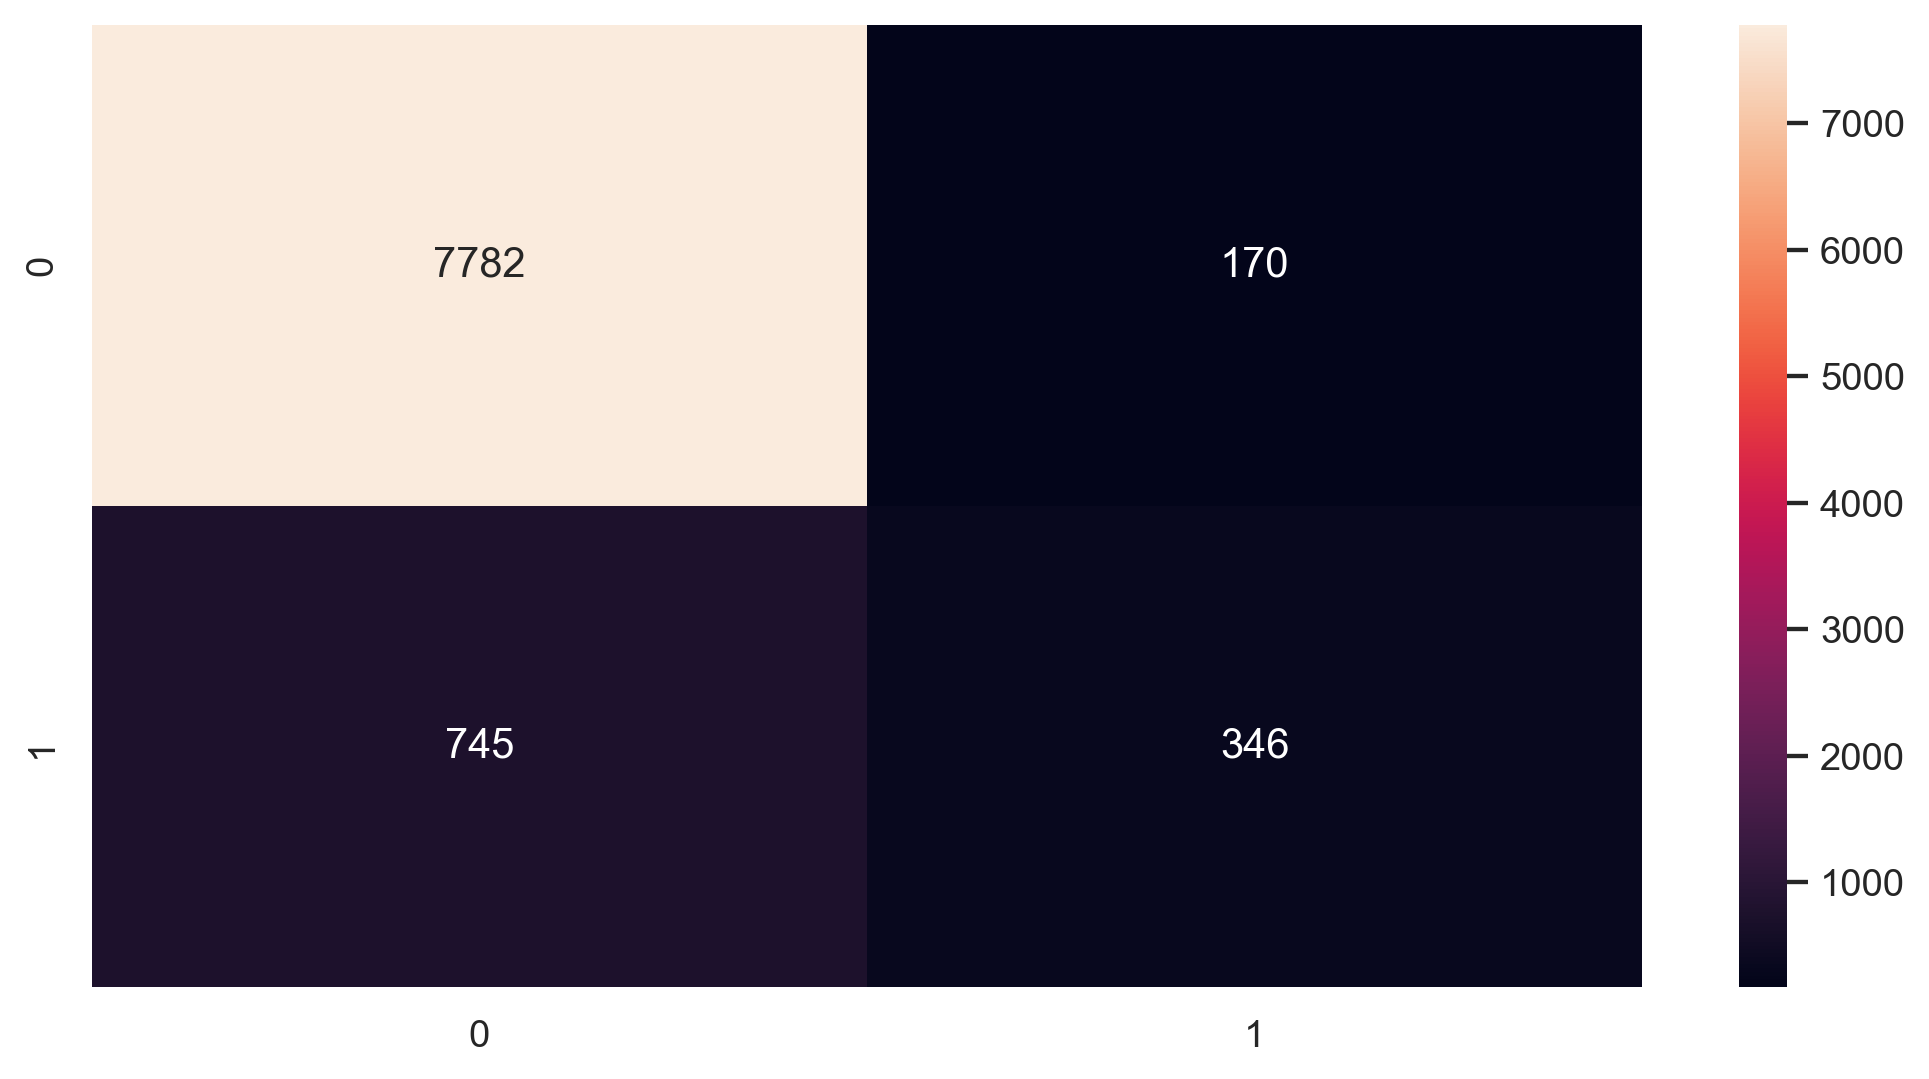

In [29]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='g')#tn, fp, fn, tp

In [30]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.67      0.32      0.43      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



# testing model

In [31]:
lg.predict_proba(xtest)

array([[0.98718035, 0.01281965],
       [0.96552909, 0.03447091],
       [0.82975312, 0.17024688],
       ...,
       [0.98060529, 0.01939471],
       [0.99049806, 0.00950194],
       [0.96166997, 0.03833003]])

In [32]:
proba = lg.predict_proba(xtest)[:,1]

In [33]:
proba

array([0.01281965, 0.03447091, 0.17024688, ..., 0.01939471, 0.00950194,
       0.03833003])

In [34]:
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score

In [35]:
auc=roc_auc_score(ytest,proba)
auc

0.9003106632462049

In [36]:
fpr,tpr,threshold=roc_curve(ytest,proba)

In [37]:
fpr.round(3)

array([0.   , 0.   , 0.   , ..., 0.967, 0.967, 1.   ])

In [38]:
tpr.round(3)

array([0.   , 0.001, 0.001, ..., 0.999, 1.   , 1.   ])

In [39]:
threshold.round(3)

array([  inf, 1.   , 0.999, ..., 0.006, 0.006, 0.   ])

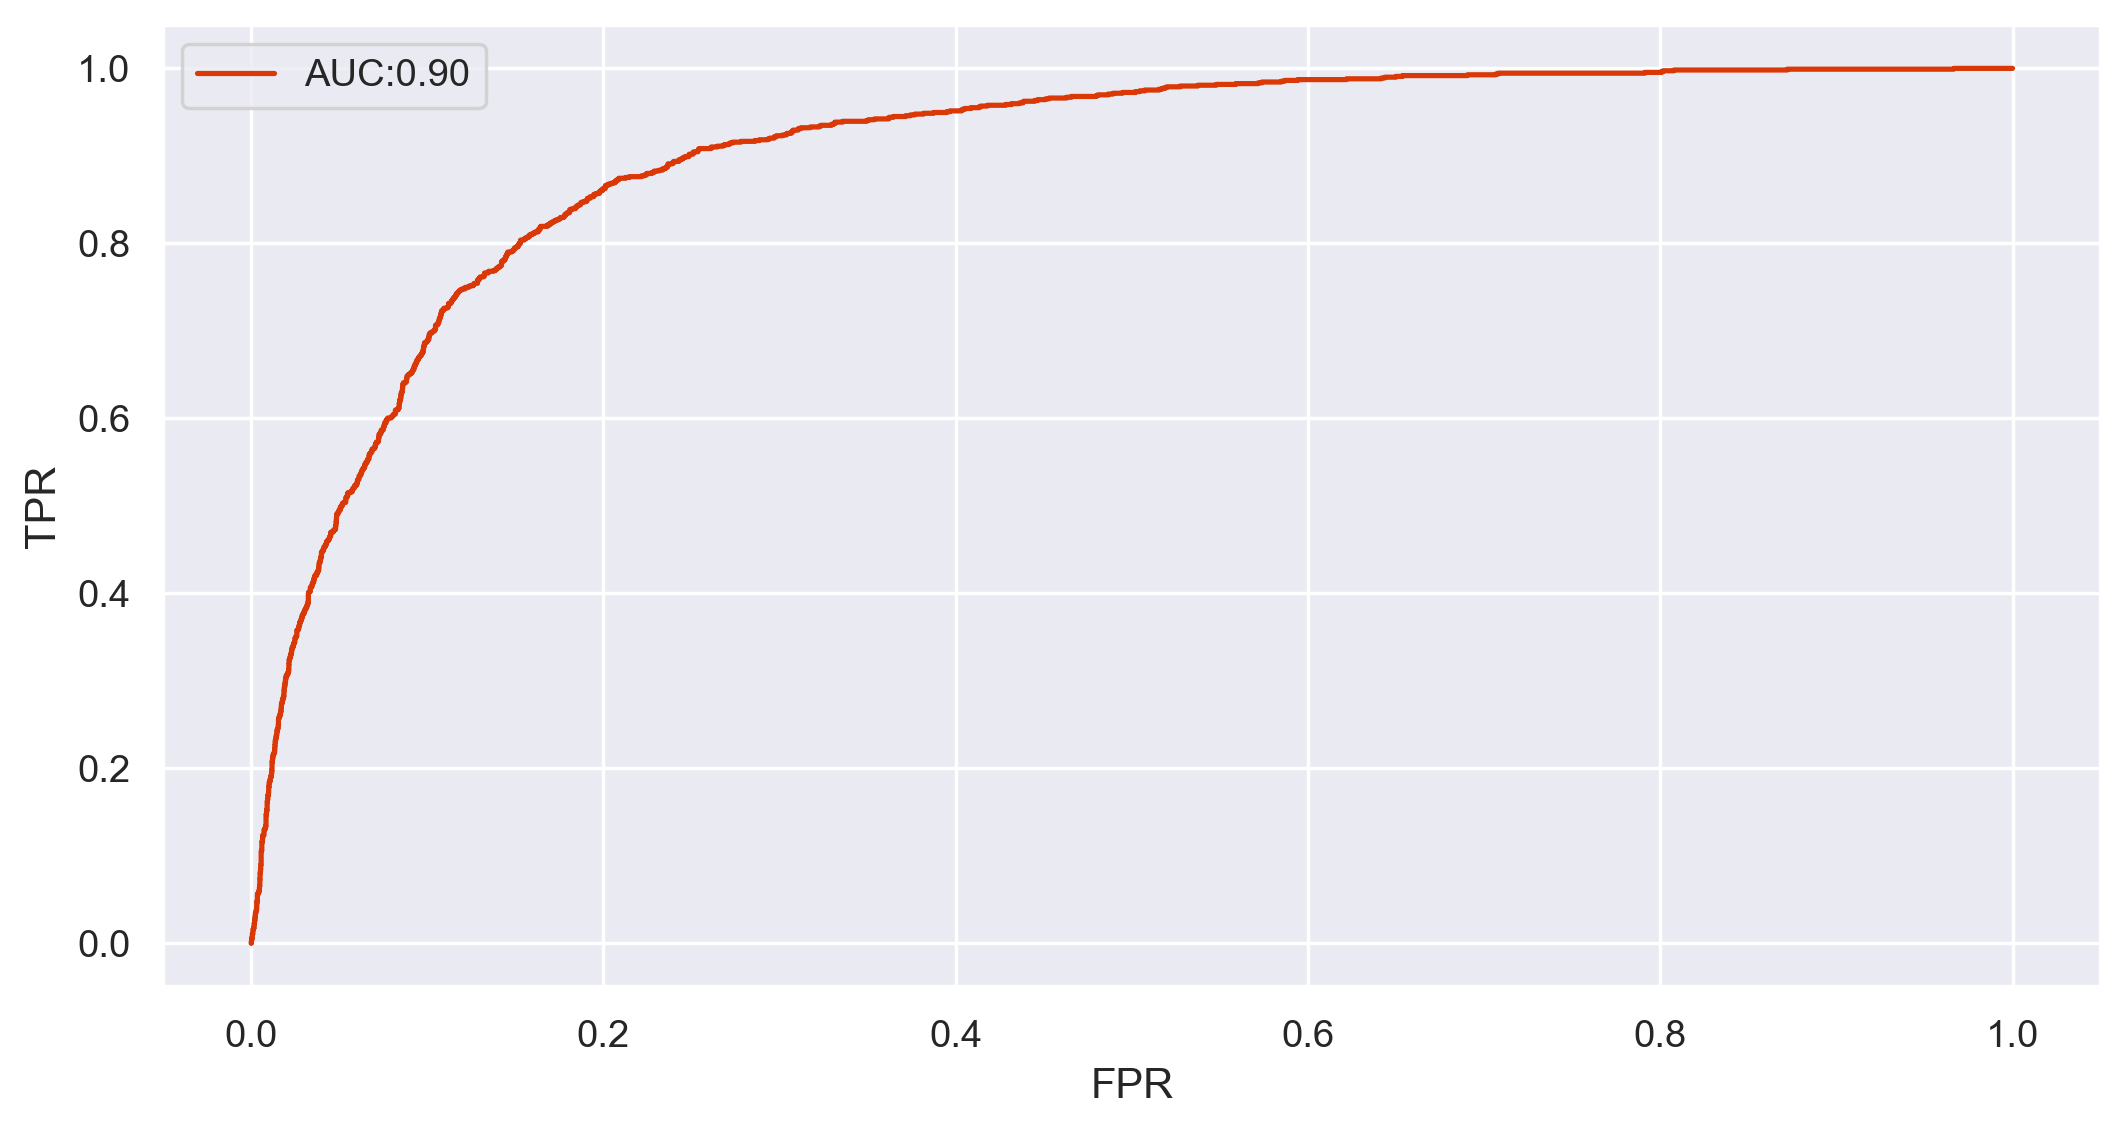

In [40]:
plt.plot(fpr,tpr,label='AUC:%0.2f'%auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()